### Training set data distribution

In [1]:
import pickle


X_train = pickle.load(open("x-train", "rb"))
y_train = pickle.load(open("y-train", "rb"))

In [2]:
X_train.shape

(28800, 12)

In [3]:
X_train.describe()

,channel_subscribers,channel_videos,channel_views,video_comments,video_dislikes,video_likes,video_views
count,2.880000e+04,28800.000000,2.880000e+04,28800.000000,2.880000e+04,2.880000e+04,2.880000e+04
mean,3.902016e+06,4432.620417,1.544025e+09,2508.441736,1.277371e+03,2.255264e+04,2.590318e+06
std,6.059595e+06,14052.457741,3.155282e+09,9599.632181,8.233652e+03,1.405234e+05,2.617725e+07
min,0.000000e+00,12.000000,1.863240e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.315150e+05,303.000000,1.174793e+08,50.000000,2.700000e+01,3.440000e+02,3.560450e+04
50%,1.435299e+06,692.000000,3.962555e+08,385.000000,1.690000e+02,2.791000e+03,3.451205e+05
75%,4.713043e+06,2065.000000,1.469754e+09,1880.250000,8.480000e+02,1.515450e+04,1.718346e+06
max,3.452421e+07,142439.000000,2.631521e+10,793927.000000,1.004742e+06,1.759136e+07,3.773968e+09


#### Plots

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

train_set = pd.concat([ X_train, y_train ], axis=1)
clickbait_set = train_set[ train_set["label"] == 1 ]
non_clickbait_set = train_set[ train_set["label"] == 0 ]

Views distribution:

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


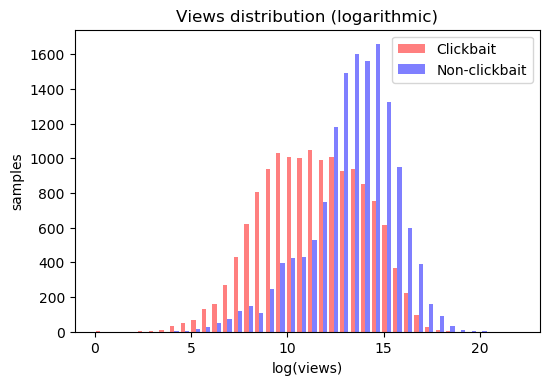

In [5]:
plt.figure(figsize=(6, 4), dpi=100)
clickbait_views_log = clickbait_set["video_views"].apply(np.log).replace([-np.inf], 0)
non_clickbait_views_log = non_clickbait_set["video_views"].apply(np.log).replace([-np.inf], 0)
plt.hist(
    [clickbait_views_log, non_clickbait_views_log], 
    bins=40, 
    color=["red", "blue"], 
    label=["Clickbait", "Non-clickbait"], 
    alpha=0.5
)
plt.title("Views distribution (logarithmic)")
plt.xlabel("log(views)")
plt.ylabel("samples")
plt.legend(loc='upper right')
plt.savefig("views-distribution-log", bbox_inches='tight')
plt.show()

Likes distribution:

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


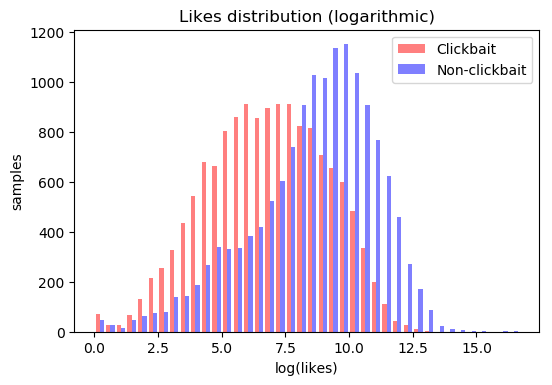

In [6]:
plt.figure(figsize=(6, 4), dpi=100)
clickbait_likes_log = clickbait_set["video_likes"].apply(np.log).replace([-np.inf], 0)
non_clickbait_likes_log = non_clickbait_set["video_likes"].apply(np.log).replace([-np.inf], 0)
plt.hist(
    [clickbait_likes_log, non_clickbait_likes_log], 
    bins=40, 
    color=["red", "blue"], 
    label=["Clickbait", "Non-clickbait"], 
    alpha=0.5
)
plt.title("Likes distribution (logarithmic)")
plt.xlabel("log(likes)")
plt.ylabel("samples")
plt.legend(loc='upper right')
plt.savefig("likes-distribution-log", bbox_inches='tight')
plt.show()

Dislikes distribution:

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


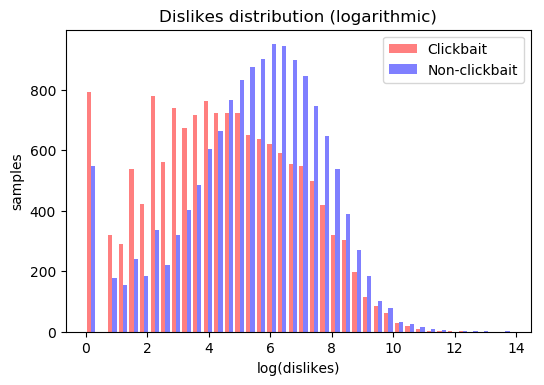

In [7]:
plt.figure(figsize=(6, 4), dpi=100)
clickbait_dislikes_log = clickbait_set["video_dislikes"].apply(np.log).replace([-np.inf], 0)
non_clickbait_dislikes_log = non_clickbait_set["video_dislikes"].apply(np.log).replace([-np.inf], 0)
plt.hist(
    [clickbait_dislikes_log, non_clickbait_dislikes_log], 
    bins=40, 
    color=["red", "blue"], 
    label=["Clickbait", "Non-clickbait"], 
    alpha=0.5
)
plt.title("Dislikes distribution (logarithmic)")
plt.xlabel("log(dislikes)")
plt.ylabel("samples")
plt.legend(loc='upper right')
plt.savefig("dislikes-distribution-log", bbox_inches='tight')
plt.show()

Comments distribution:

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


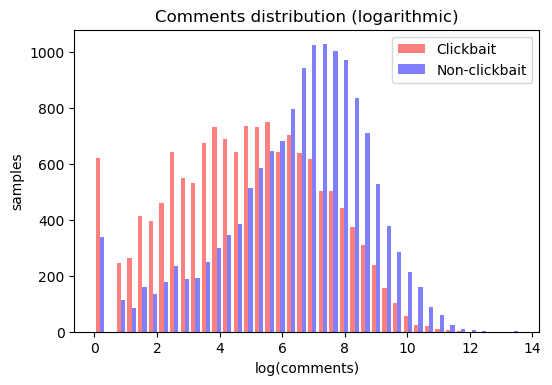

In [8]:
plt.figure(figsize=(6, 4), dpi=100)
clickbait_comments_log = clickbait_set["video_comments"].apply(np.log).replace([-np.inf], 0)
non_clickbait_comments_log = non_clickbait_set["video_comments"].apply(np.log).replace([-np.inf], 0)
plt.hist(
    [clickbait_comments_log, non_clickbait_comments_log], 
    bins=40, 
    color=["red", "blue"], 
    label=["Clickbait", "Non-clickbait"], 
    alpha=0.5
)
plt.title("Comments distribution (logarithmic)")
plt.xlabel("log(comments)")
plt.ylabel("samples")
plt.legend(loc='upper right')
plt.savefig("comments-distribution-log", bbox_inches='tight')
plt.show()

### Feature extraction

In [9]:
import re
import emoji
from gensim.parsing.preprocessing import *


def tokenize(string):

    """ Tokenizes a string.

    Adds a space between numbers and letters, removes punctuation, repeated whitespaces, words
    shorter than 2 characters, and stop-words. Returns a list of stems and, eventually, emojis.

    @param string: String to tokenize.
    @return: A list of stems and emojis.
    """

    # Based on the Ranks NL (Google) stopwords list, but "how" and "will" are not stripped, and
    # words shorter than 2 characters are not checked (since they are stripped):
    stop_words = [
        "about", "an", "are", "as", "at", "be", "by", "com", "for", "from", "in", "is", "it", "of",
        "on", "or", "that", "the", "this", "to", "was", "what", "when", "where", "who", "with",
        "the", "www"
    ]

    string = strip_short(
        strip_multiple_whitespaces(
            strip_punctuation(
                split_alphanum(string))),
        minsize=2)
    # Parse emojis:
    emojis = [c for c in string if c in emoji.UNICODE_EMOJI]
    # Remove every non-word character and stem each word:
    string = stem_text(re.sub(r"[^\w\s,]", "", string))
    # List of stems and emojis:
    tokens = string.split() + emojis

    for stop_word in stop_words:
        try:
            tokens.remove(stop_word)
        except:
            pass

    return tokens

Frequency analysis of clickbait titles tokens (stems):

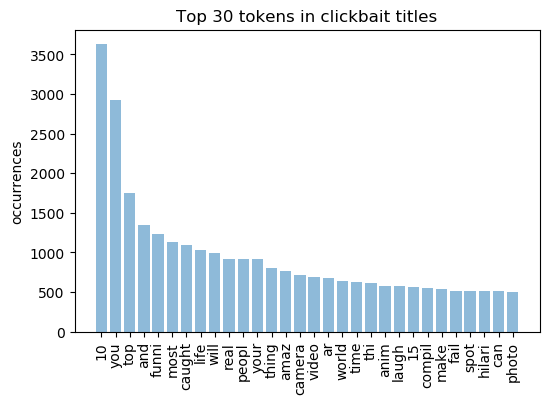

In [10]:
from sklearn.feature_extraction.text import CountVectorizer


countvect = CountVectorizer(
    lowercase=False,
    tokenizer=tokenize
).fit(clickbait_set["video_title"])
bag_of_words = countvect.transform(clickbait_set["video_title"])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, i]) for word, i in countvect.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

labels = list()
freqs = list()

for word in words_freq[:30]:
    labels.append(word[0])
    freqs.append(word[1])

plt.figure(figsize=(6, 4), dpi=100)
plt.bar(range(30), freqs, alpha=0.5)
plt.xticks(range(30), labels, rotation="vertical")
plt.title("Top 30 tokens in clickbait titles")
plt.ylabel("occurrences")
plt.savefig("top-30-clickbait-tokens", bbox_inches='tight')
plt.show()